In [78]:
## import the packages
import numpy as np

# Import Standard Qskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.providers.aer import QasmSimulator

In [79]:
## now we need to add the following  line and replace <API_Token>
IBMQ.save_account('b7b256949a73ed4e6214dd9c51ca965053d0b5017502b25deda64fcb7c7b7614852ac7fd54be93859c9d11dbfa78b48890633c54b07804850a735b1312594b0e',overwrite=True)
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-04-07 13:14:59,784: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [80]:
#provider

In [81]:
provider = IBMQ.providers()
provider=IBMQ.get_provider(hub='ibm-q-education', group='harvard-uni-1', project='intro-to-quantum')

In [82]:
# specify the backend
backend=provider.get_backend("ibmq_lima")

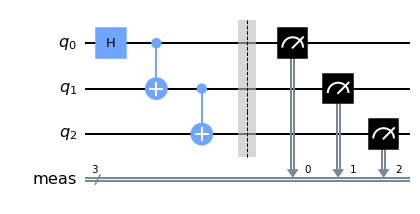

In [83]:
#Create your circuit
qc=QuantumCircuit(3)

qc.h(0)
qc.cx(0,1)
qc.cx(1,2)
qc.measure_all()

qc.draw('mpl')

In [84]:
# executing method 1 :Manually
#mapped_circuit=transpile(qc,backend=backend)
#qobj=assemble(mapped_circuit,backend=backend,shots=1024)
#job=backend.run(qobj)

/var/folders/_q/vynkw82563d98c0787lvpsr00000gn/T/ipykernel_20661/1848009916.py:4: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  job=backend.run(qobj)


In [85]:
# executing method 2: 
job=execute(qc,backend)

In [89]:
# get your job_ id
print(job.job_id())

624f1c2bcaa2651258f19db9


In [90]:
# Now lets get the results
result=job.result()
counts=result.get_counts()

In [91]:
counts

{'000': 1762,
 '001': 36,
 '010': 12,
 '011': 114,
 '100': 125,
 '101': 90,
 '110': 93,
 '111': 1768}

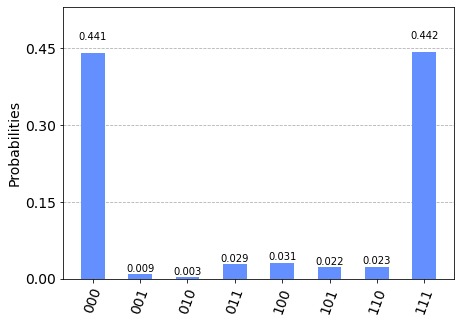

In [92]:
plot_histogram(counts)